In [25]:
import pandas as pd 

import sys
sys.path.append('../')
from src.conf import calculate_floor_area_confidence

In [4]:

pred = pd.read_csv('/Users/gracecolverd/UKPostcodePrediction/y_pred.csv')
true = pd.read_csv('/Users/gracecolverd/UKPostcodePrediction/y_true.csv')

In [10]:
pred.rename(columns={'total_gas':'total_gas_pred'}, inplace=True)
true.rename(columns={'total_gas':'total_gas_true'}, inplace=True)

In [14]:
pred.drop(columns='Unnamed: 0', inplace=True)
true.drop(columns='Unnamed: 0', inplace=True)

In [6]:
main = pd.read_csv('/Users/gracecolverd/City_clustering/notebooks/clean_v1_round2_secondfilter.csv')

/var/folders/n5/_2d3c5sd5j3810327mknn0sh0000gn/T/ipykernel_3222/611168712.py:1: DtypeWarning: Columns (149,291) have mixed types. Specify dtype option on import or set low_memory=False.
  main = pd.read_csv('/Users/gracecolverd/City_clustering/notebooks/clean_v1_round2_secondfilter.csv')


In [27]:
main.columns.tolist()

['Unnamed: 0.2',
 'Unnamed: 0.1',
 'postcode',
 'all_types_total_buildings',
 'all_types_uprn_count_total',
 'comm_alltypes_count',
 'unknown_alltypes',
 'all_res_total_buildings',
 'all_res_premise_area_total',
 'all_res_gross_area_total',
 'all_res_heated_vol_fc_total',
 'all_res_heated_vol_h_total',
 'all_res_base_floor_total',
 'all_res_basement_heated_vol_max_total',
 'all_res_listed_bool_total',
 'all_res_uprn_count_total',
 'clean_res_total_buildings',
 'clean_res_premise_area_total',
 'clean_res_gross_area_total',
 'clean_res_heated_vol_fc_total',
 'clean_res_heated_vol_h_total',
 'clean_res_base_floor_total',
 'clean_res_basement_heated_vol_max_total',
 'clean_res_listed_bool_total',
 'clean_res_uprn_count_total',
 'outb_res_total_buildings',
 'outb_res_premise_area_total',
 'outb_res_gross_area_total',
 'outb_res_heated_vol_fc_total',
 'outb_res_heated_vol_h_total',
 'outb_res_base_floor_total',
 'outb_res_basement_heated_vol_max_total',
 'outb_res_listed_bool_total',
 'outb_

In [28]:
calculate_floor_area_confidence(main, col1='clean_res_heated_vol_fc_total', col2 = 'clean_res_heated_vol_h_total'  )

,Unnamed: 0.2,Unnamed: 0.1,postcode,all_types_total_buildings,all_types_uprn_count_total,comm_alltypes_count,unknown_alltypes,all_res_total_buildings,all_res_premise_area_total,all_res_gross_area_total,...,LAD22NM,LAD22NMW,RUC11CD,RUC11,EUI,EUI_elec,h_av_gas,h_av_gas_all,h_av_elec,confidence_floor_area
0,0,0,PL6 7LP,46.0,27.0,0.0,0.0,46.0,2730.499987,5577.799982,...,Plymouth,NaN,C1,Urban city and town,57.869368,15.280560,61.077027,57.869368,16.127551,Medium
1,1,1,PL4 9PS,22.0,23.0,0.0,0.0,22.0,1391.699991,2777.499994,...,Plymouth,NaN,C1,Urban city and town,51.835351,17.904836,53.768039,51.835351,18.572421,High
2,2,2,PL1 3DT,2.0,18.0,0.0,0.0,2.0,788.899979,3155.599915,...,Plymouth,NaN,C1,Urban city and town,39.596955,11.652391,39.596955,39.596955,11.652391,Low
3,3,3,PL4 8PB,2.0,12.0,0.0,0.0,2.0,331.000000,772.299988,...,Plymouth,NaN,C1,Urban city and town,149.419917,28.098731,149.419917,149.419917,28.098731,Medium
4,4,4,PL4 8PE,19.0,23.0,0.0,0.0,19.0,739.699988,2223.800025,...,Plymouth,NaN,C1,Urban city and town,62.364215,42.266646,63.454501,62.364215,43.005576,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613954,621409,621409,W8 4AS,10.0,11.0,0.0,0.0,10.0,1036.900009,4875.300018,...,Kensington and Chelsea,NaN,A1,Urban major conurbation,85.808600,38.043602,85.808600,85.808600,38.043602,Medium
613955,621410,621410,W8 7NU,11.0,10.0,0.0,0.0,11.0,534.799999,1069.599998,...,Kensington and Chelsea,NaN,A1,Urban major conurbation,137.717939,30.282789,137.717939,137.717939,30.282789,High
613956,621412,621412,W8 7AY,7.0,44.0,0.0,0.0,7.0,588.099995,2870.999969,...,Kensington and Chelsea,NaN,A1,Urban major conurbation,102.524169,24.848617,102.524169,102.524169,24.848617,Low
613957,621413,621413,W8 7BA,5.0,5.0,0.0,0.0,5.0,268.099995,804.300018,...,Kensington and Chelsea,NaN,A1,Urban major conurbation,129.539565,17.929599,129.539565,129.539565,17.929599,Low


In [7]:

main.shape

(613959, 299)

In [37]:
df = pd.concat([main[['postcode', 'confidence_floor_area']], pred, true], axis=1)

In [38]:
df['abs_error'] = abs(df['total_gas_pred'] - df['total_gas_true'])
df['error'] = df['total_gas_pred'] - df['total_gas_true']
df['perc_error'] = df['abs_error'] / df['total_gas_true'] * 100 

In [45]:
df.perc_error.describe()

count    613959.000000
mean         14.473494
std          16.278274
min           0.000022
25%           4.863946
50%          10.494845
75%          18.979607
max        1720.624923
Name: perc_error, dtype: float64

In [36]:
df.head()

,postcode,total_gas_pred,total_gas_true,abs_error,error,perc_error
0,PL6 7LP,260951.550,303570.892273,42619.342273,-42619.342273,14.039338
1,PL4 9PS,152583.730,140025.627934,12558.102066,12558.102066,8.968431
2,PL1 3DT,101264.090,108853.650479,7589.560479,-7589.560479,6.972261
3,PL4 8PB,40835.293,104956.544226,64121.251226,-64121.251226,61.093143
4,PL4 8PE,106595.410,119413.412352,12818.002352,-12818.002352,10.734140


In [46]:
df.groupby('confidence_floor_area').perc_error.describe()   

,count,mean,std,min,25%,50%,75%,max
confidence_floor_area,,,,,,,,
High,396037.0,13.752115,14.229607,0.000022,4.702734,10.137654,18.187879,748.094790
Low,69454.0,16.350729,20.907055,0.000522,5.345876,11.607951,21.230947,1720.624923
Medium,107618.0,14.351141,16.632729,0.000104,4.850894,10.426080,18.844018,1372.952355
Not Applicable,6835.0,20.962265,26.400147,0.000525,6.678760,14.461624,27.086803,1057.402048
Very Low,34015.0,18.122697,21.965622,0.001070,5.781076,12.565576,23.464787,1249.865350


In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

def analyze_categorical_errors(df, confidence_col='confidence_floor_area'):
    """
    Analyze model errors across different categorical confidence levels
    
    Parameters:
    df: DataFrame with columns ['confidence_floor_area', 'abs_error', 'error', 'perc_error']
    confidence_col: name of the confidence level column
    """
    
    # Calculate aggregate statistics for each confidence level
    agg_stats = df.groupby(confidence_col).agg({
        'abs_error': ['count', 'mean', 'median', 'std', 'min', 'max'],
        'perc_error': ['mean', 'median', 'std', 'min', 'max'],
        'error': ['mean', 'std']
    }).round(2)
    
    # Create visualizations
    fig = plt.figure(figsize=(20, 12))
    
    # 1. Box plot of absolute errors
    plt.subplot(2, 2, 1)
    sns.boxplot(x=confidence_col, y='abs_error', data=df)
    plt.xticks(rotation=45)
    plt.xlabel('Confidence Floor Area Level')
    plt.ylabel('Absolute Error')
    plt.title('Distribution of Absolute Errors by Confidence Level')
    
    # 2. Box plot of percentage errors
    plt.subplot(2, 2, 2)
    sns.boxplot(x=confidence_col, y='perc_error', data=df)
    plt.xticks(rotation=45)
    plt.xlabel('Confidence Floor Area Level')
    plt.ylabel('Percentage Error')
    plt.title('Distribution of Percentage Errors by Confidence Level')
    
    # 3. Violin plot of errors
    plt.subplot(2, 2, 3)
    sns.violinplot(x=confidence_col, y='error', data=df)
    plt.xticks(rotation=45)
    plt.xlabel('Confidence Floor Area Level')
    plt.ylabel('Error')
    plt.title('Distribution of Errors by Confidence Level')
    
    # 4. Bar plot of mean absolute errors with error bars
    plt.subplot(2, 2, 4)
    error_means = df.groupby(confidence_col)['abs_error'].mean()
    error_sems = df.groupby(confidence_col)['abs_error'].sem()
    
    sns.barplot(x=error_means.index, y=error_means.values, 
                yerr=error_sems.values, capsize=5)
    plt.xticks(rotation=45)
    plt.xlabel('Confidence Floor Area Level')
    plt.ylabel('Mean Absolute Error')
    plt.title('Mean Absolute Error by Confidence Level\n(with Standard Error)')
    
    plt.tight_layout()
    
    return agg_stats, fig

def perform_statistical_tests(df, confidence_col='confidence_floor_area'):
    """
    Perform statistical tests to compare errors across confidence levels
    """
    # Kruskal-Wallis H-test for absolute errors
    h_stat_abs, p_value_abs = stats.kruskal(*[group['abs_error'].values 
                                             for name, group in df.groupby(confidence_col)])
    
    # Kruskal-Wallis H-test for percentage errors
    h_stat_perc, p_value_perc = stats.kruskal(*[group['perc_error'].values 
                                               for name, group in df.groupby(confidence_col)])
    
    # Prepare results
    test_results = pd.DataFrame({
        'Test': ['Kruskal-Wallis (Absolute Error)', 'Kruskal-Wallis (Percentage Error)'],
        'Statistic': [h_stat_abs, h_stat_perc],
        'P-value': [p_value_abs, p_value_perc]
    })
    
    return test_results

# Example usage



Aggregate Statistics by Confidence Level:
                      abs_error                                      \
                          count      mean    median       std   min   
confidence_floor_area                                                 
High                     396037  25445.92  18722.30  24058.47  0.03   
Low                       69454  29055.34  21220.39  27855.57  1.33   
Medium                   107618  29072.47  21532.60  27287.81  0.07   
Not Applicable             6835  25551.28  17948.00  26215.80  0.79   
Very Low                  34015  28449.52  20029.62  28128.09  1.46   

                                 perc_error                              \
                             max       mean median    std  min      max   
confidence_floor_area                                                     
High                   812185.72      13.75  10.14  14.23  0.0   748.09   
Low                    415901.02      16.35  11.61  20.91  0.0  1720.62   
Medium       

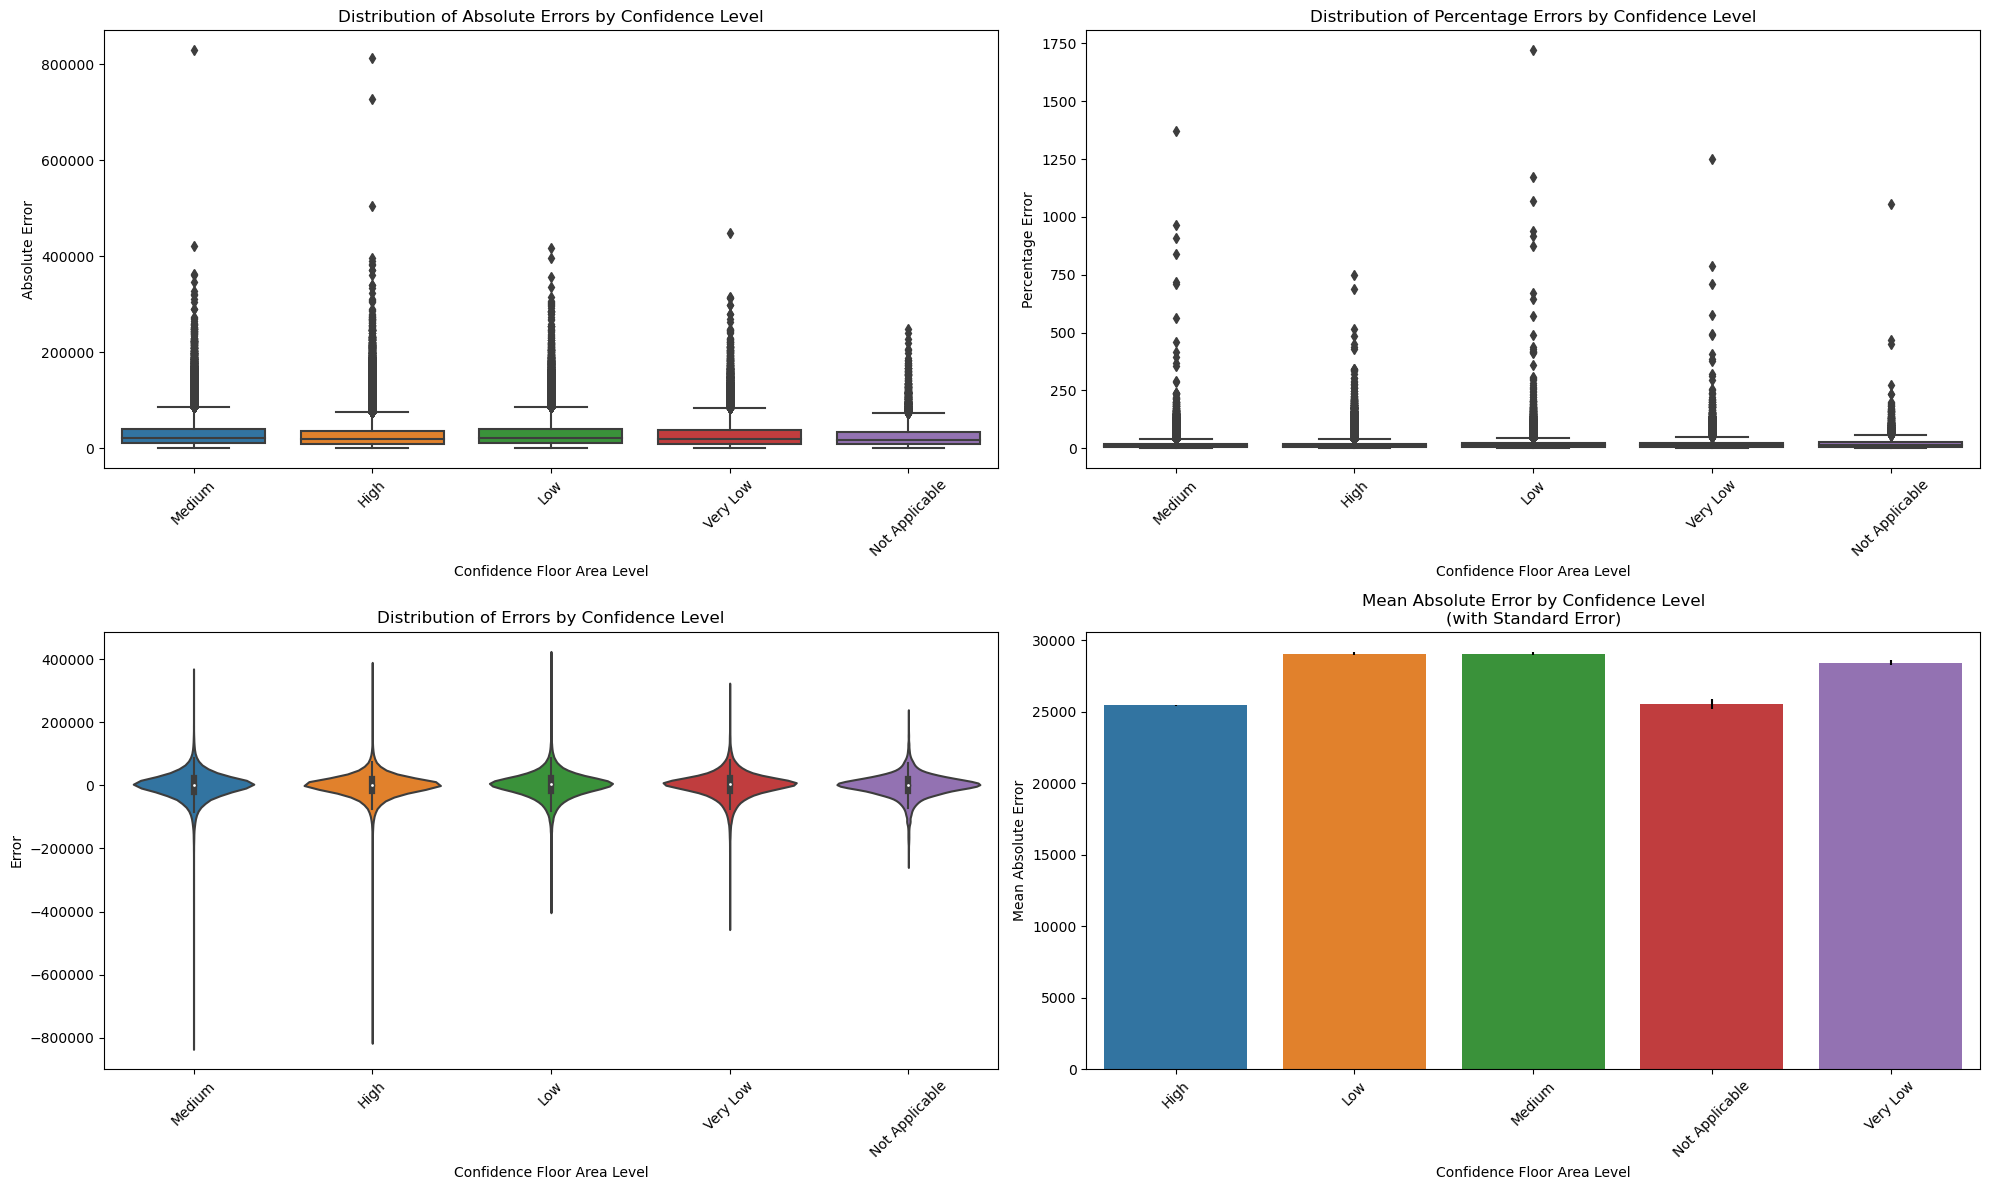

In [48]:


sample_df = df.copy() 

for level, scale in error_scales.items():
    mask = sample_df['confidence_floor_area'] == level
    sample_df.loc[mask, 'total_gas_pred'] += np.random.normal(0, scale, mask.sum())

# Calculate errors
sample_df['abs_error'] = abs(sample_df['total_gas_pred'] - sample_df['total_gas_true'])
sample_df['error'] = sample_df['total_gas_pred'] - sample_df['total_gas_true']
sample_df['perc_error'] = sample_df['abs_error'] / sample_df['total_gas_true'] * 100

# Run analysis
agg_stats, fig = analyze_categorical_errors(sample_df)
test_results = perform_statistical_tests(sample_df)

# Print results
print("\nAggregate Statistics by Confidence Level:")
print(agg_stats)
print("\nStatistical Test Results:")
print(test_results)

# Show plots
plt.show()

In [43]:
sample_df.confidence_floor_area.unique()

array(['high', 'low', 'medium'], dtype=object)

In [44]:
sample_df.groupby('confidence_floor_area').count()

,total_gas_pred,total_gas_true,abs_error,error,perc_error
confidence_floor_area,,,,,
high,319,319,319,319,319
low,355,355,355,355,355
medium,326,326,326,326,326


In [62]:

sample_df =  df.copy() 

# Calculate errors
sample_df['abs_error'] = abs(sample_df['total_gas_pred'] - sample_df['total_gas_true'])
sample_df['error'] = sample_df['total_gas_pred'] - sample_df['total_gas_true']
sample_df['perc_error_abs'] = sample_df['abs_error'] / sample_df['total_gas_true'] * 100
sample_df['perc_error'] = sample_df['error'] / sample_df['total_gas_true'] * 100


In [64]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations

def compare_group_means(df, confidence_col='confidence_floor_area', error_cols=['abs_error', 'perc_error']):
    """
    Perform pairwise comparisons between all confidence levels
    
    Parameters:
    df: DataFrame with confidence levels and error metrics
    confidence_col: name of the confidence level column
    error_cols: list of error metrics to compare
    """
    
    # Get unique confidence levels
    confidence_levels = sorted(df[confidence_col].unique())
    
    # Store results for each metric
    results = {}
    
    for error_col in error_cols:
        # Create empty lists to store results
        group1_list = []
        group2_list = []
        ttest_stat_list = []
        ttest_p_list = []
        mw_stat_list = []
        mw_p_list = []
        mean_diff_list = []
        cohen_d_list = []
        
        # Perform pairwise comparisons
        for group1, group2 in combinations(confidence_levels, 2):
            data1 = df[df[confidence_col] == group1][error_col]
            data2 = df[df[confidence_col] == group2][error_col]
            
            # T-test
            t_stat, t_p = stats.ttest_ind(data1, data2)
            
            # Mann-Whitney U test
            mw_stat, mw_p = stats.mannwhitneyu(data1, data2, alternative='two-sided')
            
            # Effect size (Cohen's d)
            cohens_d = (data1.mean() - data2.mean()) / np.sqrt(
                ((len(data1) - 1) * data1.var() + (len(data2) - 1) * data2.var()) /
                (len(data1) + len(data2) - 2)
            )
            
            # Mean difference
            mean_diff = data1.mean() - data2.mean()
            
            # Store results
            group1_list.append(group1)
            group2_list.append(group2)
            ttest_stat_list.append(t_stat)
            ttest_p_list.append(t_p)
            mw_stat_list.append(mw_stat)
            mw_p_list.append(mw_p)
            mean_diff_list.append(mean_diff)
            cohen_d_list.append(cohens_d)
        
        # Create results DataFrame
        results[error_col] = pd.DataFrame({
            'Group 1': group1_list,
            'Group 2': group2_list,
            'Mean Difference': mean_diff_list,
            'T-statistic': ttest_stat_list,
            'T-test p-value': ttest_p_list,
            'Mann-Whitney U': mw_stat_list,
            'Mann-Whitney p-value': mw_p_list,
            "Cohen's d": cohen_d_list
        })
        
        # Add significance stars
        results[error_col]['Significance'] = results[error_col]['T-test p-value'].apply(
            lambda p: '***' if p < 0.001 else ('**' if p < 0.01 else ('*' if p < 0.05 else 'ns'))
        )
    
    return results

def plot_group_means(df, confidence_col='confidence_floor_area', error_cols=['error', 'perc_error', 'abs_error', 'perc_error_abs']):
    """
    Create visualization of group means with confidence intervals
    """
    fig, axes = plt.subplots(1, len(error_cols), figsize=(7*len(error_cols), 6))
    if len(error_cols) == 1:
        axes = [axes]
    
    for ax, error_col in zip(axes, error_cols):
        # Calculate means and confidence intervals
        means = df.groupby(confidence_col)[error_col].agg(['mean', 'count', 'std']).reset_index()
        means['se'] = means['std'] / np.sqrt(means['count'])
        means['ci'] = means['se'] * stats.t.ppf((1 + 0.95) / 2, means['count'] - 1)
        
        print(means)
        # Create bar plot with confidence intervals
        sns.barplot(x=confidence_col, y='mean', data=means, ax=ax,
                   capsize=5, errwidth=2, yerr=means['ci'])  # Add yerr parameter
        
        # Add value labels on top of bars
        for i, v in enumerate(means['mean']):
            # Adjust text position to be above the confidence interval
            text_height = v + means['ci'].iloc[i]  # Place text above the error bar
            ax.text(i, text_height, f'{v:.2f}', ha='center', va='bottom')
        
        ax.set_title(f'Mean {error_col} by Confidence Level\nwith 95% CI')
        ax.set_xlabel('Confidence Floor Area Level')
        ax.set_ylabel(f'Mean {error_col}')
        
        # Optional: Add sample size annotations
        for i, count in enumerate(means['count']):
            ax.text(i, ax.get_ylim()[0], f'n={count}', ha='center', va='top',
                   rotation=0, fontsize=8)
    
    plt.tight_layout()
    return fig



In [65]:
sample_df.head()

,postcode,confidence_floor_area,total_gas_pred,total_gas_true,abs_error,error,perc_error,perc_error_abs
0,PL6 7LP,Medium,260951.550,303570.892273,42619.342273,-42619.342273,-14.039338,14.039338
1,PL4 9PS,High,152583.730,140025.627934,12558.102066,12558.102066,8.968431,8.968431
2,PL1 3DT,Low,101264.090,108853.650479,7589.560479,-7589.560479,-6.972261,6.972261
3,PL4 8PB,Medium,40835.293,104956.544226,64121.251226,-64121.251226,-61.093143,61.093143
4,PL4 8PE,Low,106595.410,119413.412352,12818.002352,-12818.002352,-10.734140,10.734140


In [66]:
from scipy.stats import sem

sample_df.groupby('confidence_floor_area')[['error', 'abs_error']].sem()


,error,abs_error
confidence_floor_area,,
High,55.643809,38.229632
Low,152.694429,105.697190
Medium,121.543544,83.181402
Not Applicable,442.803037,317.098201
Very Low,216.730251,152.512336



Comparison Results for abs_error:
          Group 1         Group 2  Mean Difference  T-statistic  \
0            High             Low       -3609.4248     -35.5769   
1            High          Medium       -3626.5501     -42.5665   
2            High  Not Applicable        -105.3580      -0.3584   
3            High        Very Low       -3003.6000     -21.7823   
4             Low          Medium         -17.1253      -0.1279   
5             Low  Not Applicable        3504.0668       9.9743   
6             Low        Very Low         605.8248       3.2758   
7          Medium  Not Applicable        3521.1921      10.3686   
8          Medium        Very Low         622.9501       3.6429   
9  Not Applicable        Very Low       -2898.2420      -7.8601   

   T-test p-value  Mann-Whitney U  Mann-Whitney p-value  Cohen's d  \
0          0.0000    1.280693e+10                0.0000    -0.1464   
1          0.0000    1.969453e+10                0.0000    -0.1463   
2          0.7200

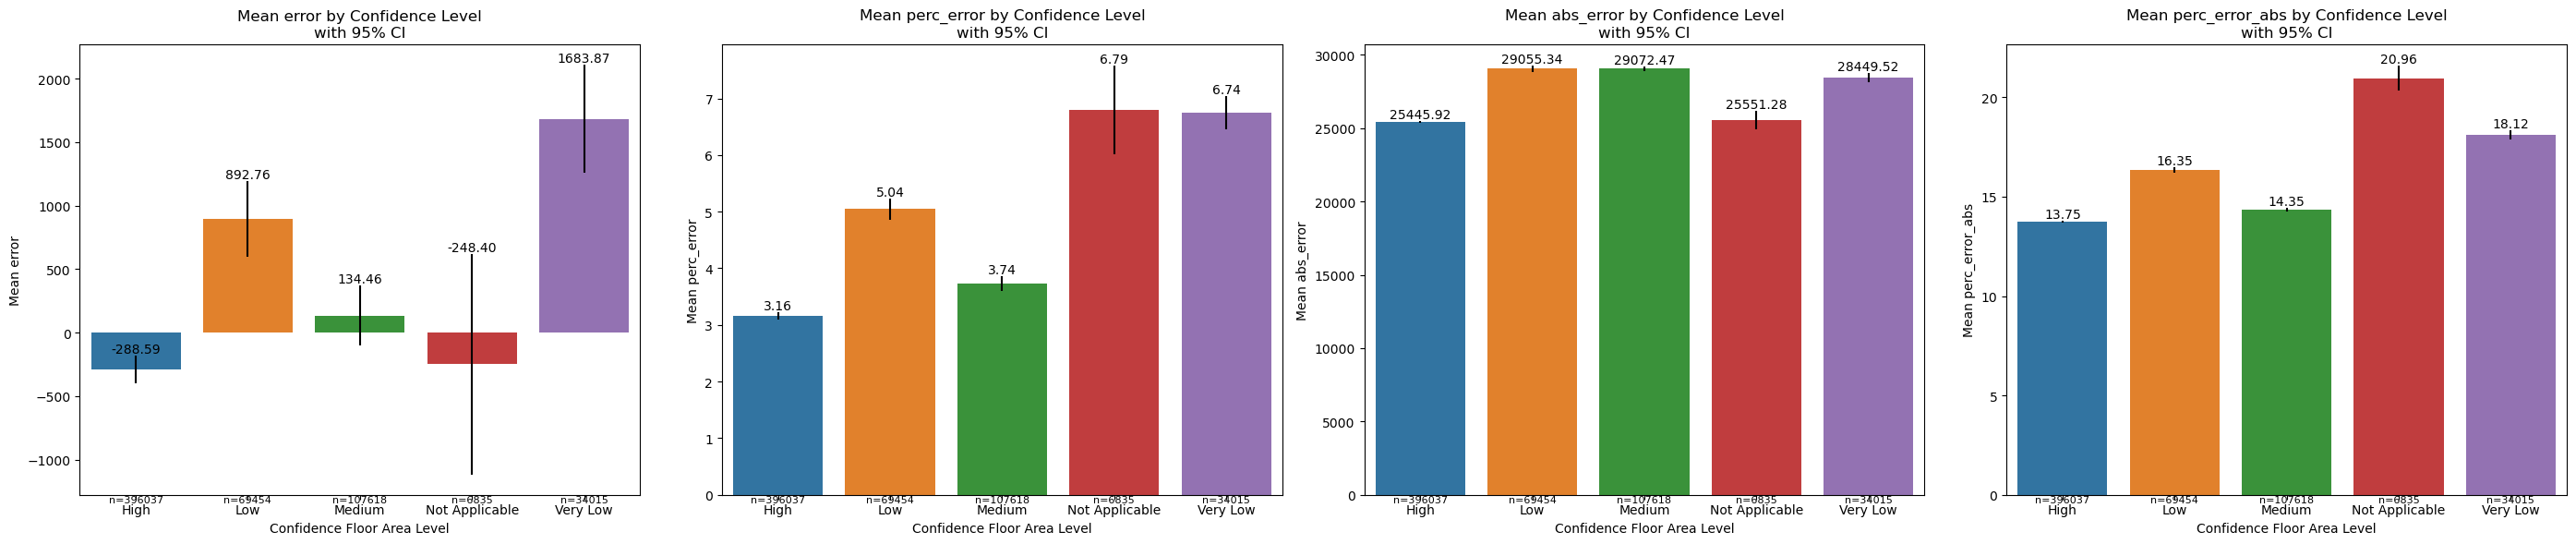


Summary Statistics:
                      abs_error                                   perc_error  \
                          count        mean         std       sem       mean   
confidence_floor_area                                                          
High                     396037  25445.9172  24058.4699   38.2296     3.1597   
Low                       69454  29055.3419  27855.5714  105.6972     5.0441   
Medium                   107618  29072.4673  27287.8107   83.1814     3.7360   
Not Applicable             6835  25551.2752  26215.7953  317.0982     6.7939   
Very Low                  34015  28449.5172  28128.0879  152.5123     6.7422   

                                        
                           std     sem  
confidence_floor_area                   
High                   19.5351  0.0310  
Low                    26.0578  0.0989  
Medium                 21.6483  0.0660  
Not Applicable         33.0195  0.3994  
Very Low               27.6672  0.1500  


In [67]:
confidence_levels = ['Very Low' , 'Low', 'Medium', 'High']



# Run analysis
comparison_results = compare_group_means(sample_df)

# Print results for each error metric
for metric, results_df in comparison_results.items():
    print(f"\nComparison Results for {metric}:")
    print(results_df.round(4))

# Create visualization
fig = plot_group_means(sample_df)
plt.show()

# Print summary statistics
print("\nSummary Statistics:")
summary = sample_df.groupby('confidence_floor_area').agg({
    'abs_error': ['count', 'mean', 'std', 'sem'],
    'perc_error': ['mean', 'std', 'sem']
}).round(4)
print(summary)


Summary Statistics:
                       Raw Error Mean  Raw Error Median  Absolute Error Mean  \
confidence_floor_area                                                          
High                          -288.59           1245.41             25445.92   
Low                            892.76           2891.34             29055.34   
Medium                         134.46           2020.99             29072.47   
Not Applicable                -248.40           1821.13             25551.28   
Very Low                      1683.87           4088.16             28449.52   

                       Absolute Error Median   Count  Raw Error Std  \
confidence_floor_area                                                 
High                                18722.30  396037       35017.47   
Low                                 21220.39   69454       40241.28   
Medium                              21532.60  107618       39872.58   
Not Applicable                      17948.00    6835       3660

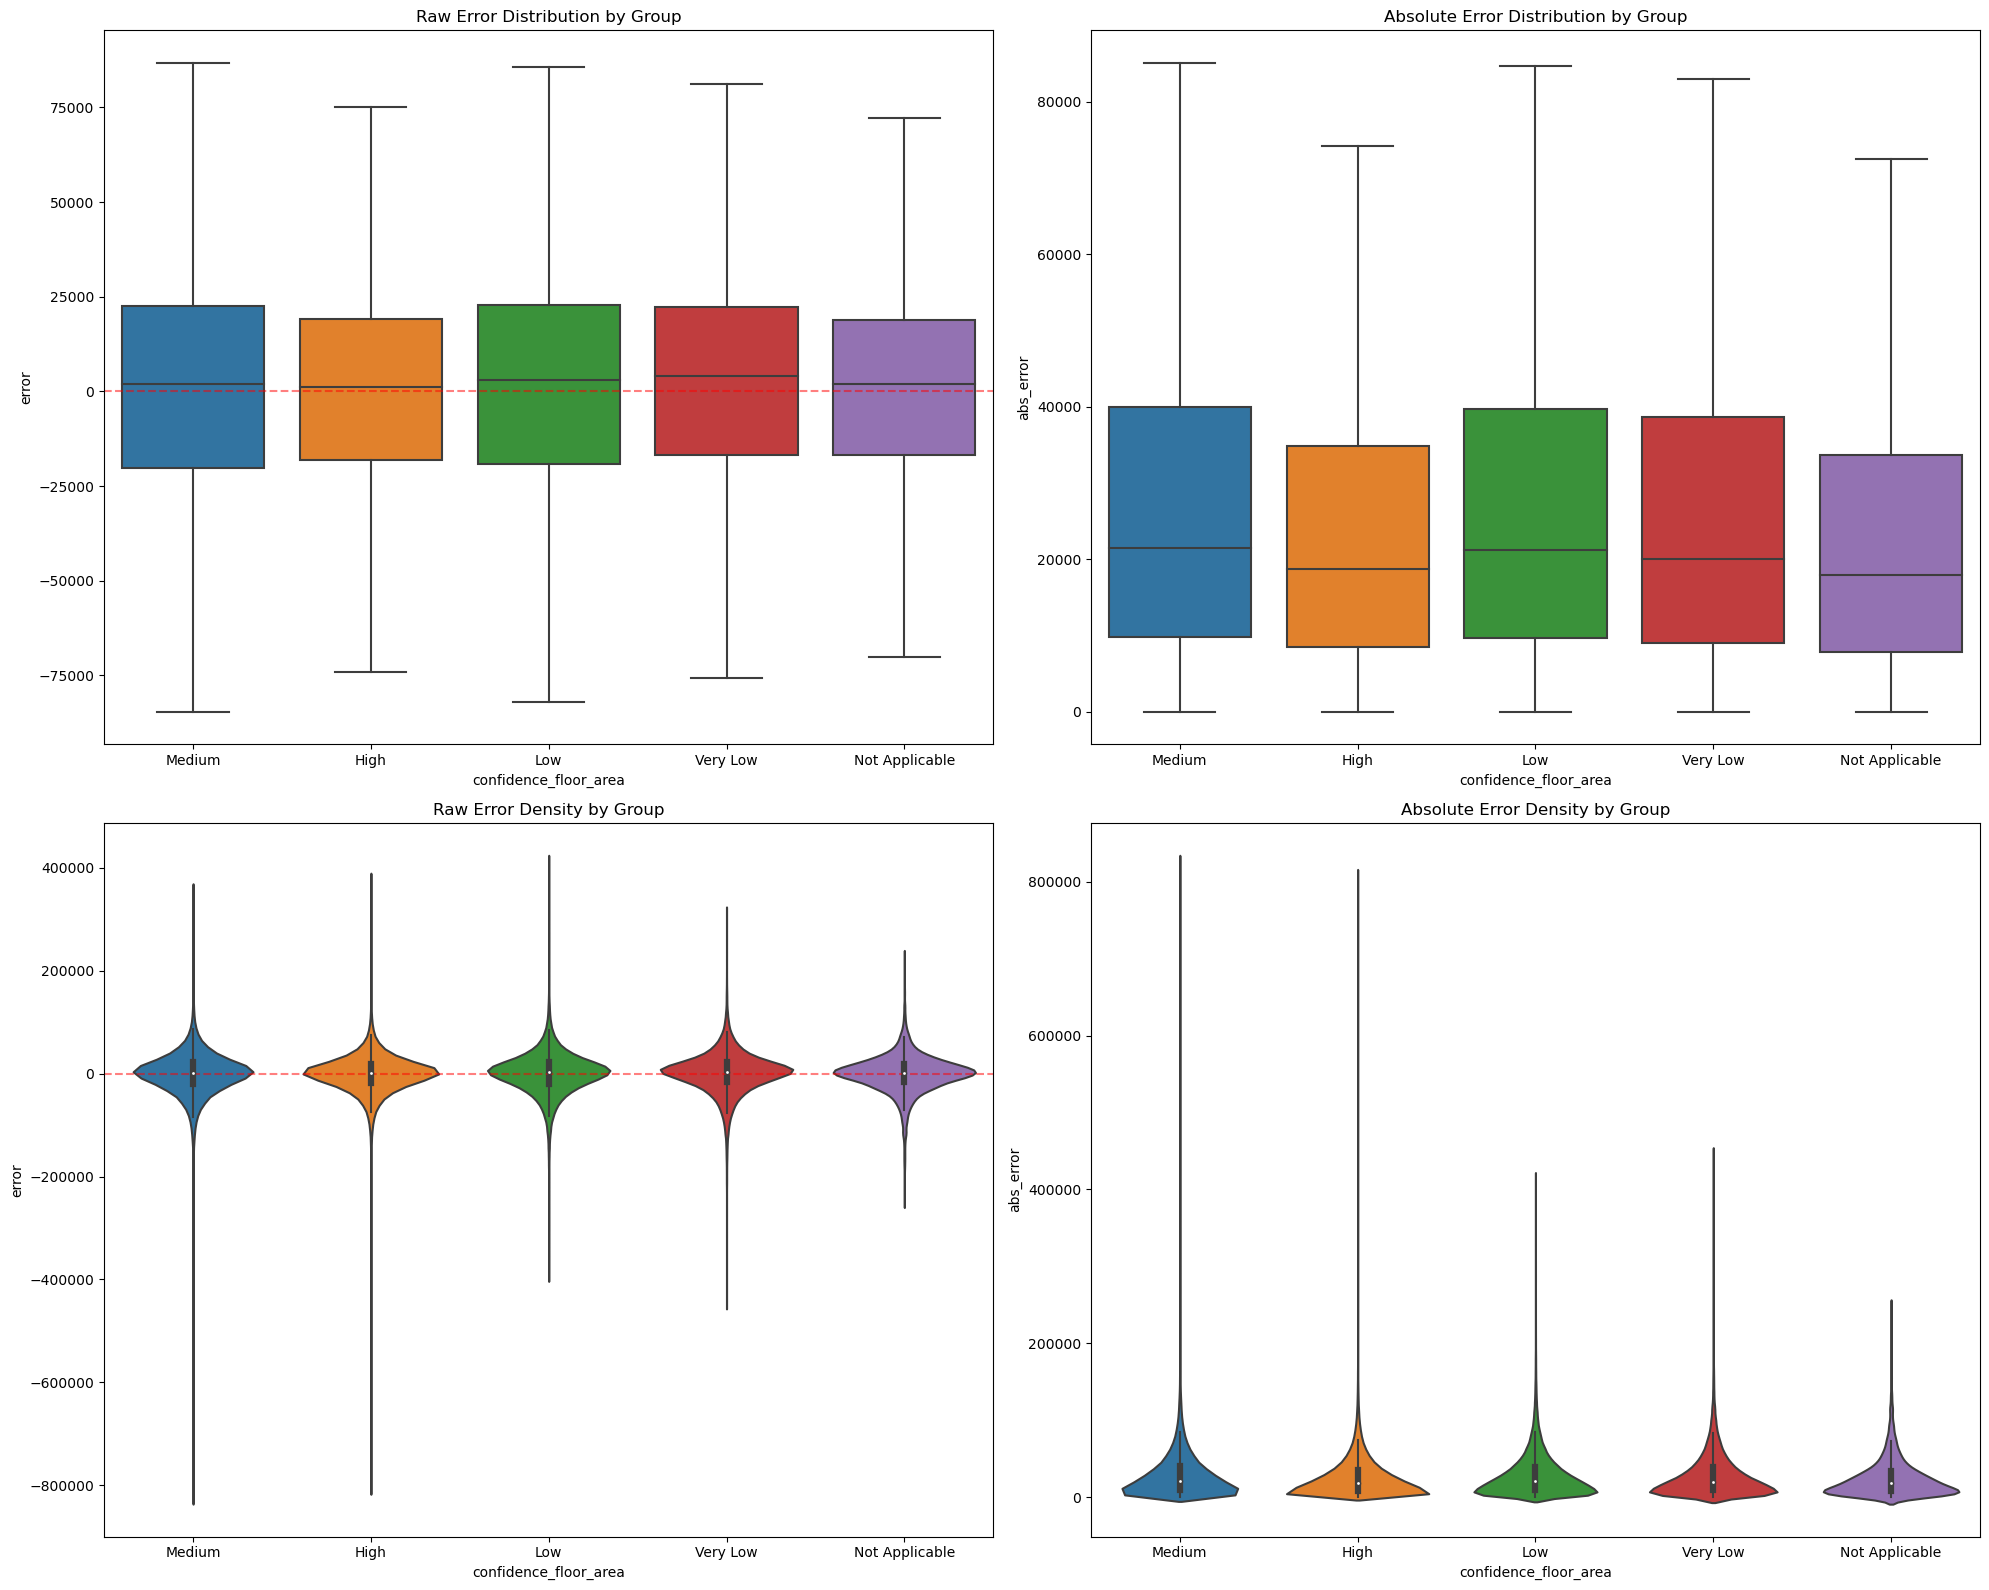

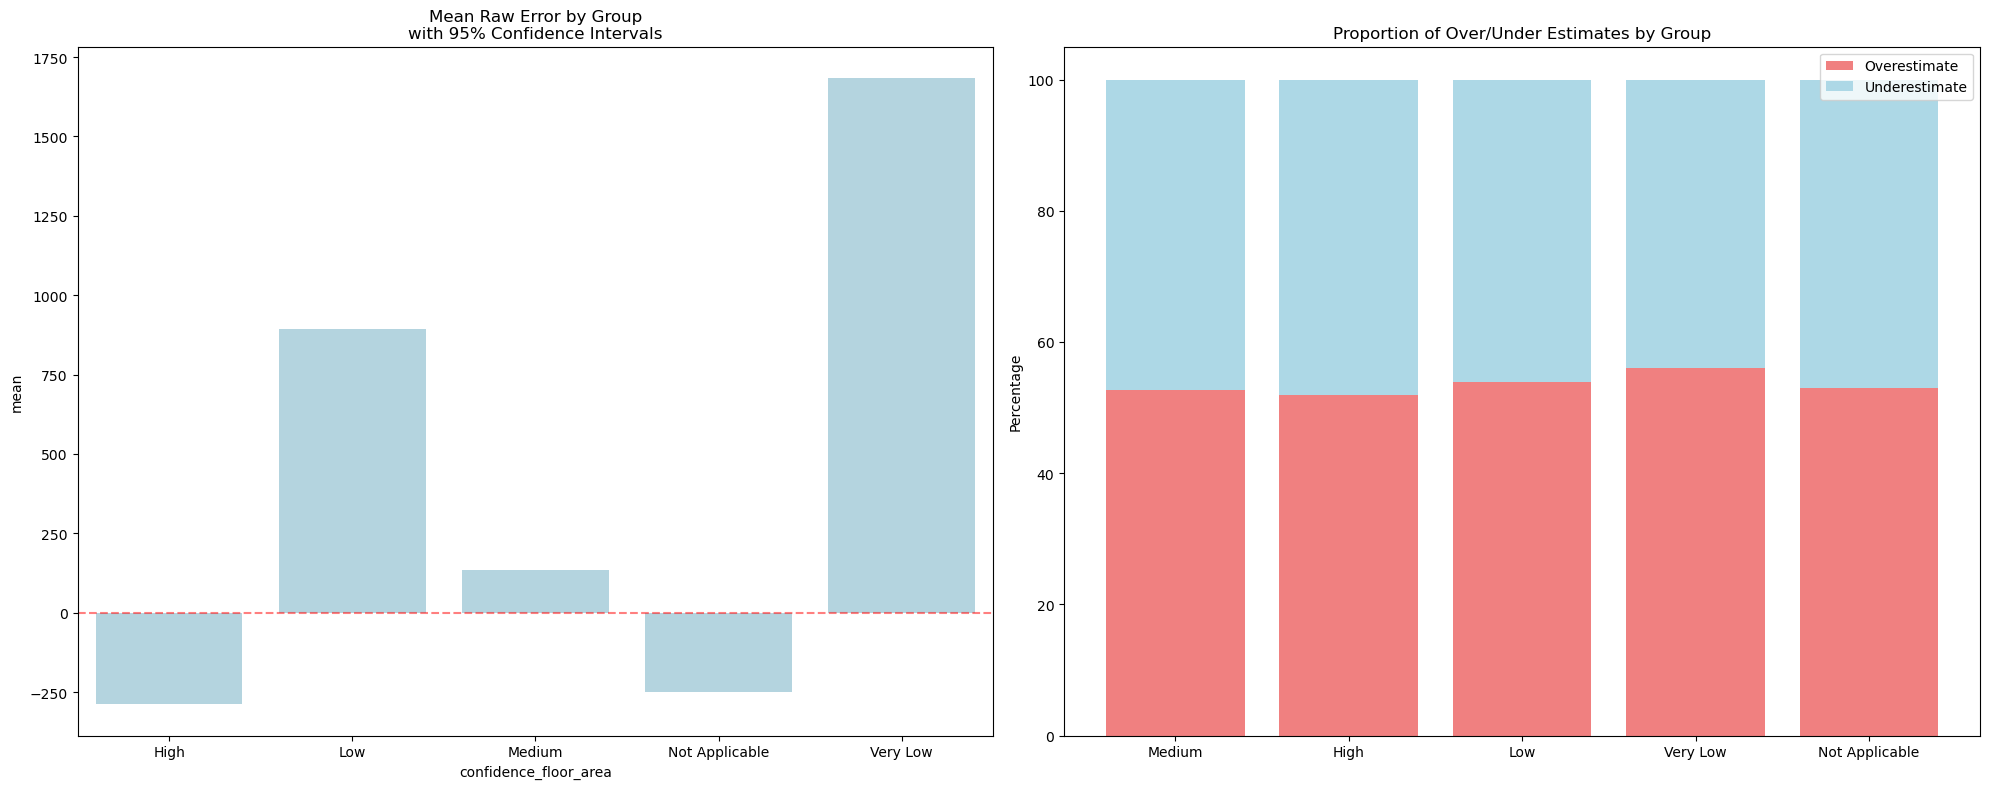

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

def analyze_error_distributions(df, group_col='confidence_floor_area'):
    """
    Analyze both absolute and raw errors to understand bias and magnitude
    
    Parameters:
    df: DataFrame with columns [group_col, 'error', 'abs_error']
    group_col: column name for grouping variable
    """
    # Calculate summary statistics for both error types
    summary_stats = pd.DataFrame({
        'Raw Error Mean': df.groupby(group_col)['error'].mean(),
        'Raw Error Median': df.groupby(group_col)['error'].median(),
        'Absolute Error Mean': df.groupby(group_col)['abs_error'].mean(),
        'Absolute Error Median': df.groupby(group_col)['abs_error'].median(),
        'Count': df.groupby(group_col).size()
    }).round(2)
    
    # Add standard deviations
    summary_stats['Raw Error Std'] = df.groupby(group_col)['error'].std().round(2)
    summary_stats['Absolute Error Std'] = df.groupby(group_col)['abs_error'].std().round(2)
    
    # Calculate percentage of positive/negative errors
    error_direction = df.groupby(group_col).apply(
        lambda x: pd.Series({
            'Overestimates (%)': (x['error'] > 0).mean() * 100,
            'Underestimates (%)': (x['error'] < 0).mean() * 100
        })
    ).round(2)
    
    summary_stats = pd.concat([summary_stats, error_direction], axis=1)
    
    # Create visualizations
    fig, axes = plt.subplots(2, 2, figsize=(20, 16))
    
    # 1. Box plots side by side
    sns.boxplot(x=group_col, y='error', data=df, ax=axes[0,0], showfliers=False)
    axes[0,0].set_title('Raw Error Distribution by Group')
    axes[0,0].axhline(y=0, color='r', linestyle='--', alpha=0.5)
    
    sns.boxplot(x=group_col, y='abs_error', data=df, ax=axes[0,1], showfliers=False)
    axes[0,1].set_title('Absolute Error Distribution by Group')
    
    # 2. Violin plots with individual points
    sns.violinplot(x=group_col, y='error', data=df, ax=axes[1,0])
    axes[1,0].set_title('Raw Error Density by Group')
    axes[1,0].axhline(y=0, color='r', linestyle='--', alpha=0.5)
    
    sns.violinplot(x=group_col, y='abs_error', data=df, ax=axes[1,1])
    axes[1,1].set_title('Absolute Error Density by Group')
    
    plt.tight_layout()
    
    return summary_stats, fig

def plot_error_patterns(df, group_col='confidence_floor_area'):
    """
    Create visualizations to show error patterns and bias
    """
    fig, axes = plt.subplots(1, 2, figsize=(20, 8))
    
    # 1. Bar plot showing mean errors with error bars
    error_means = df.groupby(group_col)['error'].agg(['mean', 'sem']).reset_index()
    error_means['ci'] = error_means['sem'] * 1.96  # 95% confidence interval
    
    sns.barplot(x=group_col, y='mean', data=error_means, ax=axes[0], 
                capsize=5, color='lightblue')
    axes[0].set_title('Mean Raw Error by Group\nwith 95% Confidence Intervals')
    axes[0].axhline(y=0, color='r', linestyle='--', alpha=0.5)
    
    # 2. Stacked bar showing proportion of over/under estimates
    proportions = pd.DataFrame({
        'group': df[group_col].unique(),
        'overestimate': [
            (df[df[group_col] == g]['error'] > 0).mean() * 100
            for g in df[group_col].unique()
        ],
        'underestimate': [
            (df[df[group_col] == g]['error'] < 0).mean() * 100
            for g in df[group_col].unique()
        ]
    })
    
    bottom = np.zeros(len(proportions))
    axes[1].bar(proportions['group'], proportions['overestimate'], 
                label='Overestimate', bottom=bottom, color='lightcoral')
    bottom += proportions['overestimate']
    axes[1].bar(proportions['group'], proportions['underestimate'], 
                label='Underestimate', bottom=bottom, color='lightblue')
    
    axes[1].set_title('Proportion of Over/Under Estimates by Group')
    axes[1].set_ylabel('Percentage')
    axes[1].legend()
    
    plt.tight_layout()
    return fig

# Example usage with sample data
if __name__ == "__main__":
    # Create sample data
   
    groups = ['High', 'Medium', 'Low', 'Not Applicable', 'Very Low']
    
    
    # Run analysis
    summary_stats, dist_fig = analyze_error_distributions(df)
    pattern_fig = plot_error_patterns(df)
    
    # Print summary
    print("\nSummary Statistics:")
    print(summary_stats)
    
    print("\nWhen to use each error type:")
    print("\nRaw Error (error):")
    print("- Shows direction of errors (over/under prediction)")
    print("- Can identify systematic bias in predictions")
    print("- Positive and negative errors can cancel out")
    print("- Mean close to 0 might hide large errors in both directions")
    
    print("\nAbsolute Error (abs_error):")
    print("- Shows magnitude of errors regardless of direction")
    print("- Better for comparing overall accuracy")
    print("- Cannot identify systematic bias")
    print("- Always positive, so easier to interpret magnitude")
    
    # Show plots
    plt.show()


Key Findings:

Absolute Error:
1. Largest differences:
   - Largest positive: Medium vs Not Applicable: 3521.2
   - Largest negative: High vs Medium: -3626.6

2. Non-significant differences (p > 0.05):
   - High vs Not Applicable: p = 0.7200
   - Low vs Medium: p = 0.8982

Percentage Error:
1. Largest differences:
   - Largest positive: Not Applicable vs Very Low: 2.84%
   - Largest negative: High vs Not Applicable: -7.21%


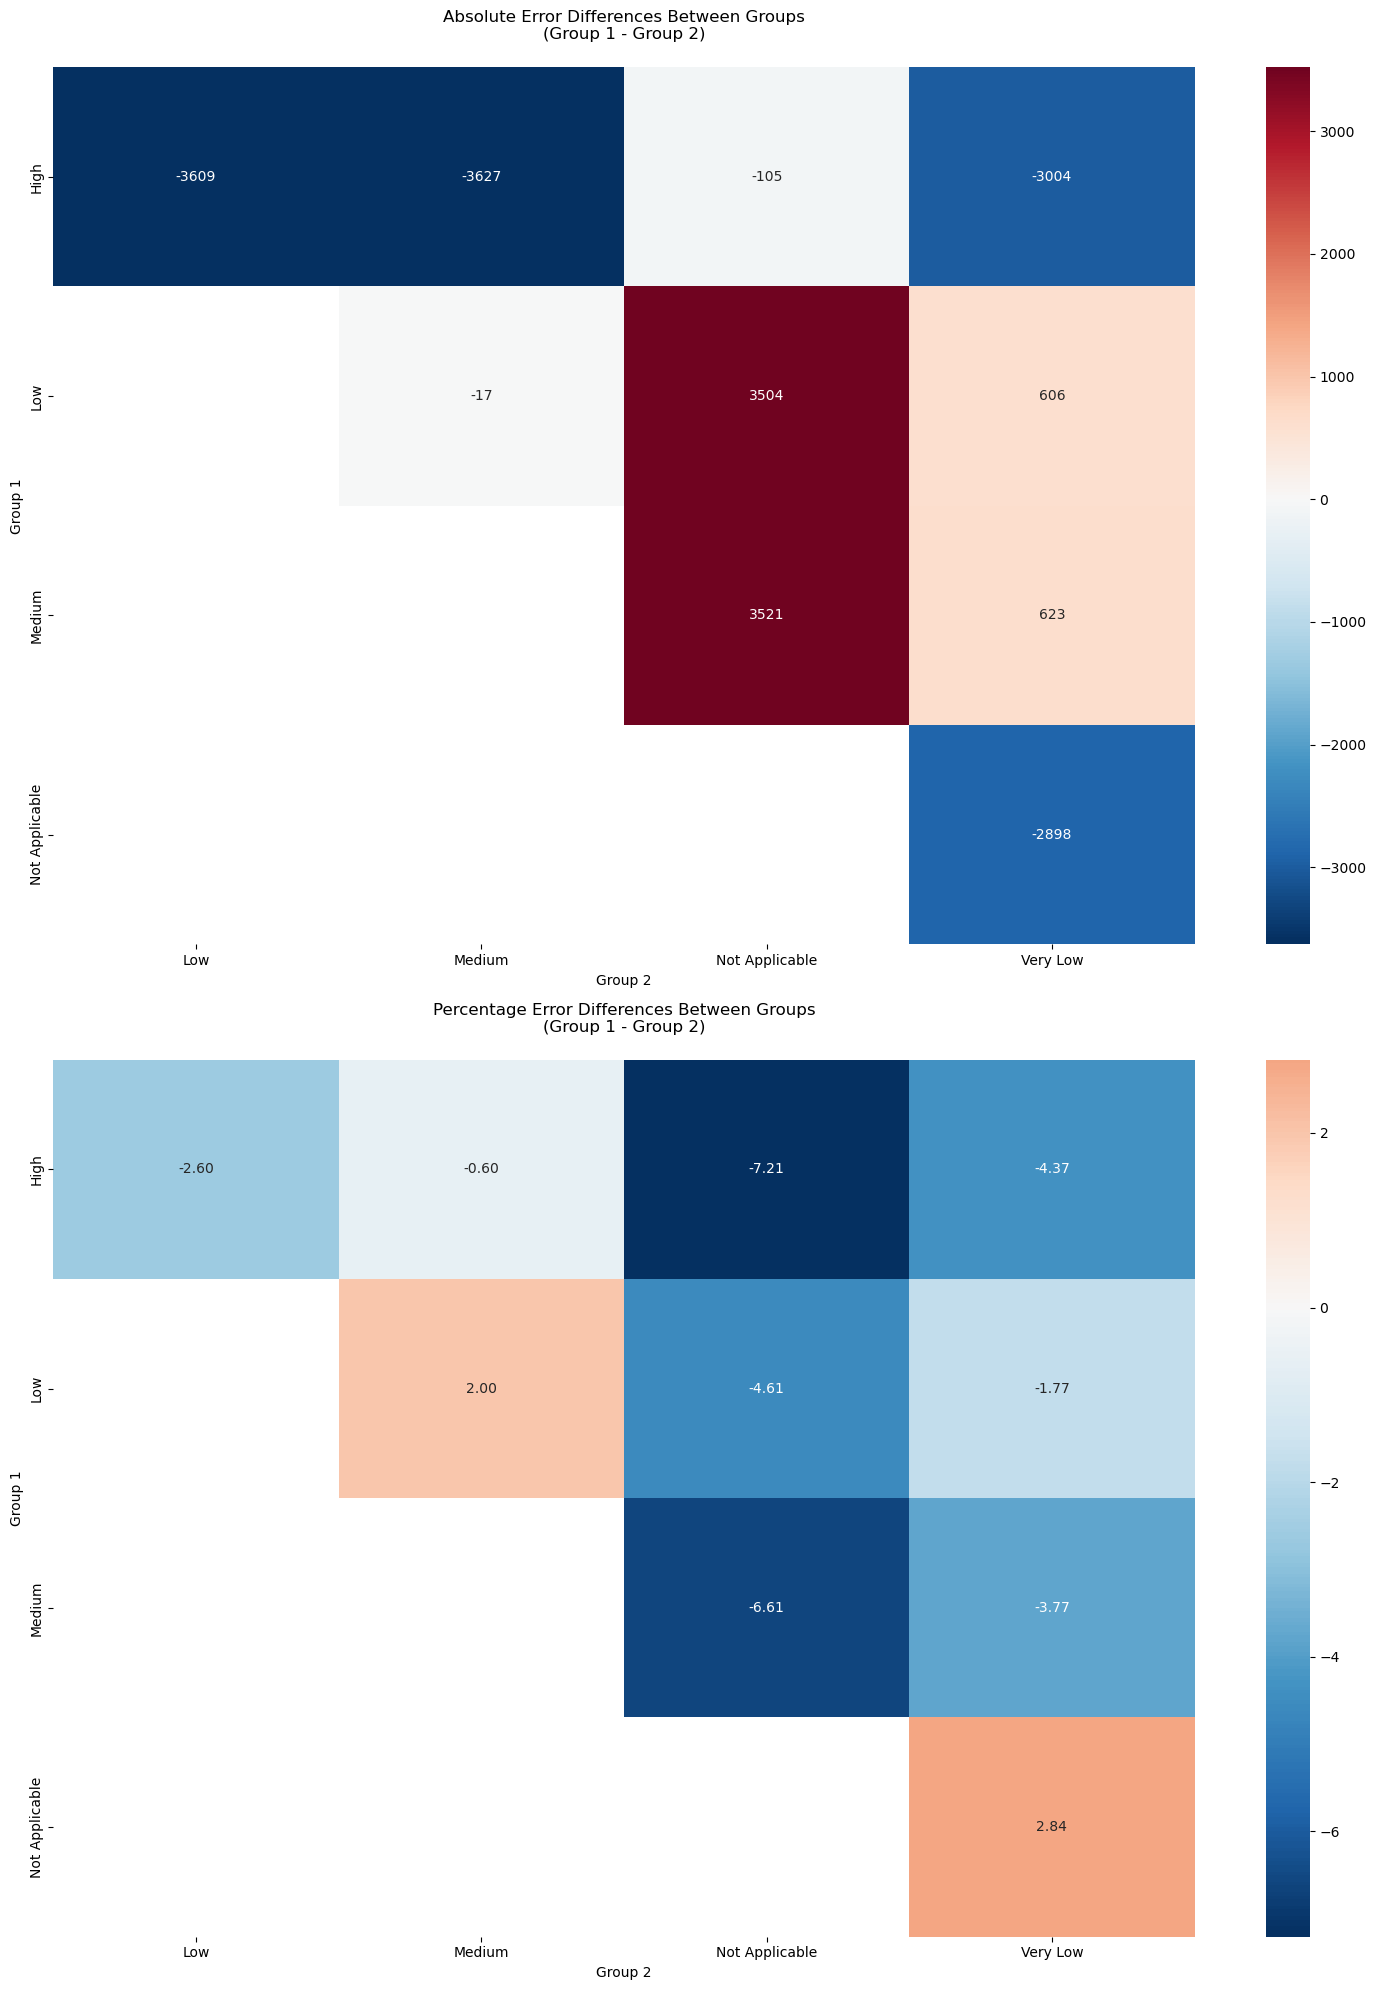

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def create_comparison_summary(results_data):
    # Create DataFrames from the results
    abs_error_df = pd.DataFrame({
        'Group 1': ['High', 'High', 'High', 'High', 'Low', 'Low', 'Low', 'Medium', 'Medium', 'Not Applicable'],
        'Group 2': ['Low', 'Medium', 'Not Applicable', 'Very Low', 'Medium', 'Not Applicable', 'Very Low', 'Not Applicable', 'Very Low', 'Very Low'],
        'Mean Difference': [-3609.42, -3626.55, -105.36, -3003.60, -17.13, 3504.07, 605.82, 3521.19, 622.95, -2898.24],
        'P-value': [0.0000, 0.0000, 0.7200, 0.0000, 0.8982, 0.0000, 0.0011, 0.0000, 0.0003, 0.0000],
        "Cohen's d": [-0.1464, -0.1463, -0.0044, -0.1231, -0.0006, 0.1264, 0.0217, 0.1293, 0.0227, -0.1042],
        'Metric': 'Absolute Error'
    })

    perc_error_df = pd.DataFrame({
        'Group 1': ['High', 'High', 'High', 'High', 'Low', 'Low', 'Low', 'Medium', 'Medium', 'Not Applicable'],
        'Group 2': ['Low', 'Medium', 'Not Applicable', 'Very Low', 'Medium', 'Not Applicable', 'Very Low', 'Not Applicable', 'Very Low', 'Very Low'],
        'Mean Difference': [-2.60, -0.60, -7.21, -4.37, 2.00, -4.61, -1.77, -6.61, -3.77, 2.84],
        'P-value': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
        "Cohen's d": [-0.1686, -0.0405, -0.4965, -0.2916, 0.1085, -0.2149, -0.0833, -0.3806, -0.2089, 0.1247],
        'Metric': 'Percentage Error'
    })

    return pd.concat([abs_error_df, perc_error_df])

def plot_comparison_results(comparison_df):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 20))
    
    # Plot for Absolute Error
    abs_error_data = comparison_df[comparison_df['Metric'] == 'Absolute Error']
    
    # Create heatmap-style visualization for absolute error
    matrix_abs = pd.pivot_table(
        abs_error_data,
        values='Mean Difference',
        index='Group 1',
        columns='Group 2'
    )
    
    sns.heatmap(matrix_abs, annot=True, fmt='.0f', cmap='RdBu_r', center=0, ax=ax1)
    ax1.set_title('Absolute Error Differences Between Groups\n(Group 1 - Group 2)', pad=20)
    
    # Plot for Percentage Error
    perc_error_data = comparison_df[comparison_df['Metric'] == 'Percentage Error']
    
    # Create heatmap-style visualization for percentage error
    matrix_perc = pd.pivot_table(
        perc_error_data,
        values='Mean Difference',
        index='Group 1',
        columns='Group 2'
    )
    
    sns.heatmap(matrix_perc, annot=True, fmt='.2f', cmap='RdBu_r', center=0, ax=ax2)
    ax2.set_title('Percentage Error Differences Between Groups\n(Group 1 - Group 2)', pad=20)
    
    plt.tight_layout()
    return fig

# Create and plot the analysis
comparison_df = create_comparison_summary(None)  # No input needed as we have the data
fig = plot_comparison_results(comparison_df)

# Print key findings
print("\nKey Findings:")
print("\nAbsolute Error:")
print("1. Largest differences:")
abs_error_data = comparison_df[comparison_df['Metric'] == 'Absolute Error'].sort_values(by='Mean Difference', ascending=False)
print(f"   - Largest positive: {abs_error_data.iloc[0]['Group 1']} vs {abs_error_data.iloc[0]['Group 2']}: {abs_error_data.iloc[0]['Mean Difference']:.1f}")
print(f"   - Largest negative: {abs_error_data.iloc[-1]['Group 1']} vs {abs_error_data.iloc[-1]['Group 2']}: {abs_error_data.iloc[-1]['Mean Difference']:.1f}")

print("\n2. Non-significant differences (p > 0.05):")
non_sig = comparison_df[
    (comparison_df['Metric'] == 'Absolute Error') & 
    (comparison_df['P-value'] > 0.05)
]
for _, row in non_sig.iterrows():
    print(f"   - {row['Group 1']} vs {row['Group 2']}: p = {row['P-value']:.4f}")

print("\nPercentage Error:")
print("1. Largest differences:")
perc_error_data = comparison_df[comparison_df['Metric'] == 'Percentage Error'].sort_values(by='Mean Difference', ascending=False)
print(f"   - Largest positive: {perc_error_data.iloc[0]['Group 1']} vs {perc_error_data.iloc[0]['Group 2']}: {perc_error_data.iloc[0]['Mean Difference']:.2f}%")
print(f"   - Largest negative: {perc_error_data.iloc[-1]['Group 1']} vs {perc_error_data.iloc[-1]['Group 2']}: {perc_error_data.iloc[-1]['Mean Difference']:.2f}%")

# Show plot
plt.show()


Statistical Test Results for error:
          Group 1         Group 2  Mean Difference  Median Difference  \
0            High             Low       -1181.3422         -1645.9310   
1            High          Medium        -423.0452          -775.5804   
2            High  Not Applicable         -40.1905          -575.7218   
3            High        Very Low       -1972.4588         -2842.7526   
4             Low          Medium         758.2971           870.3506   
5             Low  Not Applicable        1141.1517          1070.2092   
6             Low        Very Low        -791.1166         -1196.8216   
7          Medium  Not Applicable         382.8547           199.8586   
8          Medium        Very Low       -1549.4136         -2067.1722   
9  Not Applicable        Very Low       -1932.2683         -2267.0308   

   T-statistic  T-test p-value  Mann-Whitney U  Mann-Whitney p-value  \
0      -8.0113          0.0000    1.337016e+10                0.0000   
1      -3.4081 

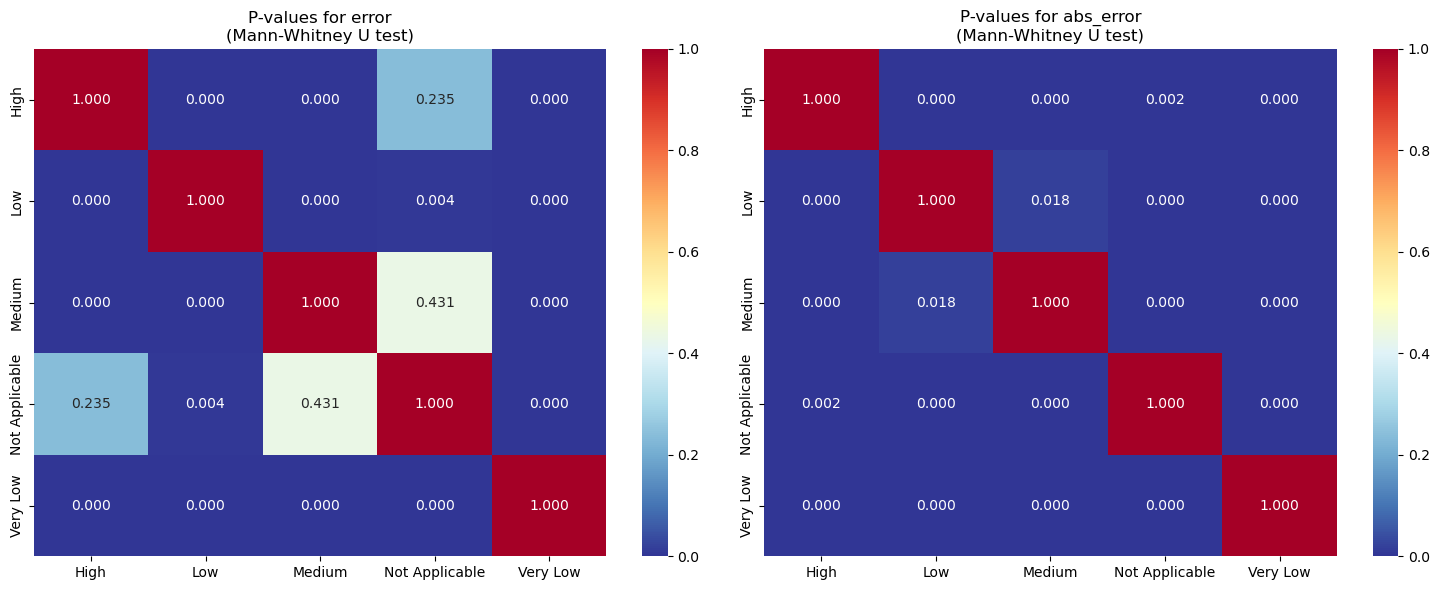


Significant differences in error:
High vs Low:
  Mean diff: -1181.34
  Significance: ***
High vs Medium:
  Mean diff: -423.05
  Significance: ***
High vs Very Low:
  Mean diff: -1972.46
  Significance: ***
Low vs Medium:
  Mean diff: 758.30
  Significance: ***
Low vs Not Applicable:
  Mean diff: 1141.15
  Significance: *
Low vs Very Low:
  Mean diff: -791.12
  Significance: **
Medium vs Very Low:
  Mean diff: -1549.41
  Significance: ***
Not Applicable vs Very Low:
  Mean diff: -1932.27
  Significance: ***

Significant differences in abs_error:
High vs Low:
  Mean diff: -3609.42
  Significance: ***
High vs Medium:
  Mean diff: -3626.55
  Significance: ***
High vs Very Low:
  Mean diff: -3003.60
  Significance: ***
Low vs Not Applicable:
  Mean diff: 3504.07
  Significance: ***
Low vs Very Low:
  Mean diff: 605.82
  Significance: **
Medium vs Not Applicable:
  Mean diff: 3521.19
  Significance: ***
Medium vs Very Low:
  Mean diff: 622.95
  Significance: ***
Not Applicable vs Very Low:


In [78]:
import pandas as pd
import numpy as np
from scipy import stats
from itertools import combinations
import seaborn as sns
import matplotlib.pyplot as plt

def perform_statistical_tests(df, group_col='confidence_floor_area', 
                            error_cols=['error', 'abs_error']):
    """
    Perform comprehensive statistical tests between all group pairs
    
    Parameters:
    df: DataFrame with columns [group_col, error, abs_error]
    group_col: column name for grouping variable
    error_cols: list of error metrics to test
    """
    groups = sorted(df[group_col].unique())
    group_pairs = list(combinations(groups, 2))
    
    results = {}
    for error_col in error_cols:
        # Store results for each metric
        test_results = []
        
        for group1, group2 in group_pairs:
            data1 = df[df[group_col] == group1][error_col]
            data2 = df[df[group_col] == group2][error_col]
            
            # T-test for means
            t_stat, t_p = stats.ttest_ind(data1, data2)
            
            # Mann-Whitney U test (non-parametric)
            mw_stat, mw_p = stats.mannwhitneyu(data1, data2, alternative='two-sided')
            
            # Kolmogorov-Smirnov test for distribution shape
            ks_stat, ks_p = stats.ks_2samp(data1, data2)
            
            # Effect size (Cohen's d)
            cohens_d = (data1.mean() - data2.mean()) / np.sqrt(
                ((len(data1) - 1) * data1.var() + (len(data2) - 1) * data2.var()) /
                (len(data1) + len(data2) - 2)
            )
            
            # Descriptive statistics
            mean_diff = data1.mean() - data2.mean()
            median_diff = data1.median() - data2.median()
            
            test_results.append({
                'Group 1': group1,
                'Group 2': group2,
                'Mean Difference': mean_diff,
                'Median Difference': median_diff,
                'T-statistic': t_stat,
                'T-test p-value': t_p,
                'Mann-Whitney U': mw_stat,
                'Mann-Whitney p-value': mw_p,
                'KS statistic': ks_stat,
                'KS p-value': ks_p,
                "Cohen's d": cohens_d
            })
        
        results[error_col] = pd.DataFrame(test_results)
        
        # Add significance indicators
        results[error_col]['Significance'] = results[error_col]['T-test p-value'].apply(
            lambda p: '***' if p < 0.001 else 
                     ('**' if p < 0.01 else 
                      ('*' if p < 0.05 else 'ns'))
        )
    
    return results

def create_pvalue_heatmap(df, group_col='confidence_floor_area', 
                         error_cols=['error', 'abs_error']):
    """Create heatmap of p-values for all group comparisons"""
    groups = sorted(df[group_col].unique())
    n_groups = len(groups)
    
    fig, axes = plt.subplots(1, len(error_cols), figsize=(15, 6))
    if len(error_cols) == 1:
        axes = [axes]
    
    for idx, error_col in enumerate(error_cols):
        # Create empty matrix for p-values
        p_values = np.zeros((n_groups, n_groups))
        
        # Fill matrix with p-values
        for i, group1 in enumerate(groups):
            for j, group2 in enumerate(groups):
                if i != j:
                    _, p = stats.mannwhitneyu(
                        df[df[group_col] == group1][error_col],
                        df[df[group_col] == group2][error_col],
                        alternative='two-sided'
                    )
                    p_values[i, j] = p
                else:
                    p_values[i, j] = 1
        
        # Create heatmap
        sns.heatmap(p_values, 
                   xticklabels=groups,
                   yticklabels=groups,
                   annot=True,
                   fmt='.3f',
                   cmap='RdYlBu_r',
                   ax=axes[idx])
        
        axes[idx].set_title(f'P-values for {error_col}\n(Mann-Whitney U test)')
    
    plt.tight_layout()
    return fig

# Example usage
if __name__ == "__main__":
    # Assuming df is your DataFrame with columns:
    # ['confidence_floor_area', 'error', 'abs_error']
    
    # Run statistical tests
    test_results = perform_statistical_tests(df)
    
    # Print results for each error metric
    for metric, results_df in test_results.items():
        print(f"\nStatistical Test Results for {metric}:")
        print(results_df.round(4))
    
    # Create p-value heatmap
    fig = create_pvalue_heatmap(df)
    plt.show()
    
    # Print summary of significant differences
    for metric, results_df in test_results.items():
        print(f"\nSignificant differences in {metric}:")
        sig_results = results_df[results_df['Significance'] != 'ns']
        for _, row in sig_results.iterrows():
            print(f"{row['Group 1']} vs {row['Group 2']}:")
            print(f"  Mean diff: {row['Mean Difference']:.2f}")
            # print(f"  Effect size (Cohen's d): {row['Cohen\'s d']:.3f}")
            print(f"  Significance: {row['Significance']}")